<a href="https://colab.research.google.com/github/Rohitsingh24-cloud/deeplearnproject/blob/main/mnistdatasetusingann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import tensorflow

In [4]:
from tensorflow import keras
from tensorflow.keras import datasets


In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
import cv2

In [8]:
from PIL import Image

In [9]:
tensorflow.random.set_seed(3)

In [10]:
from keras.datasets import mnist

In [11]:
from tensorflow.math import confusion_matrix

In [12]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
type(x_train)

numpy.ndarray

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
y_train.shape

(60000,)

3

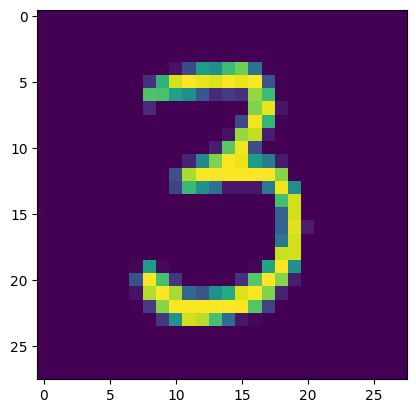

In [16]:
plt.imshow(x_train[50])
y_train[50]

In [17]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [18]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


In [19]:
#we are going to normalize the data as it lie between 0-255

In [20]:
x_train=x_train/255
x_test=x_test/255

In [21]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
#now build the neural network for cnn

In [23]:
from keras import Sequential

In [24]:
from keras.layers import Dense

In [25]:
from keras.layers import Flatten

In [26]:
from keras.layers import Conv2D

In [27]:
model=keras.Sequential()

In [28]:
model.add(Flatten(input_shape=(28,28)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.add(Dense(128,activation='relu'))

In [30]:
model.add(Dense(64,activation='relu'))

In [31]:
model.add(Dense(10,activation='sigmoid'))

In [32]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8773 - loss: 0.4225
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9667 - loss: 0.1111
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9772 - loss: 0.0739
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9841 - loss: 0.0526
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9875 - loss: 0.0395
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9890 - loss: 0.0334
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9918 - loss: 0.0251
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9928 - loss: 0.0218
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9930 - loss: 0.0195
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9932 - loss: 0.0198


In [34]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9731 - loss: 0.1203


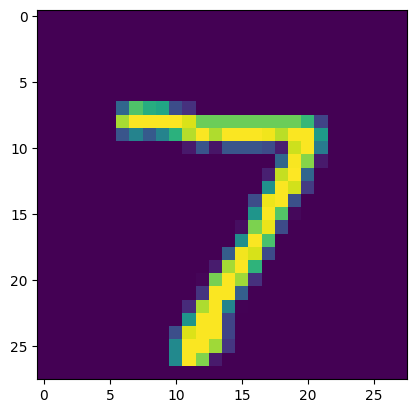

In [35]:
image1=plt.imshow(x_test[0])

In [36]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [37]:
y_pred[0]

array([1.7622758e-02, 7.6914057e-06, 1.2955180e-01, 9.9916923e-01,
       1.6332585e-09, 3.3848808e-06, 9.8015528e-12, 1.0000000e+00,
       3.7869834e-04, 9.9820870e-01], dtype=float32)

In [38]:

np.argmax(y_pred[0])


7

In [39]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [40]:
y_pred_labels[0]

7

In [41]:
conf_matrix=confusion_matrix(y_test,y_pred_labels)

In [42]:
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    1,    2,    0,    2,    1,    7,    0,    1,    4],
       [   0, 1118,    4,    2,    3,    0,    3,    2,    3,    0],
       [   2,    0, 1007,    4,    3,    0,    3,    8,    5,    0],
       [   0,    0,    2,  987,    0,    7,    0,    6,    5,    3],
       [   0,    0,    5,    0,  962,    0,    2,    2,    2,    9],
       [   1,    0,    0,   24,    3,  852,    6,    0,    4,    2],
       [   2,    2,    0,    1,   12,    1,  940,    0,    0,    0],
       [   1,    1,    7,    1,    1,    0,    0, 1005,    2,   10],
       [   1,    0,    3,    6,    4,    2,    4,    3,  947,    4],
       [   1,    2,    0,    3,   16,    5,    1,    4,    4,  973]],
      dtype=int32)>

Text(0.5, 23.52222222222222, 'predicted_labels')

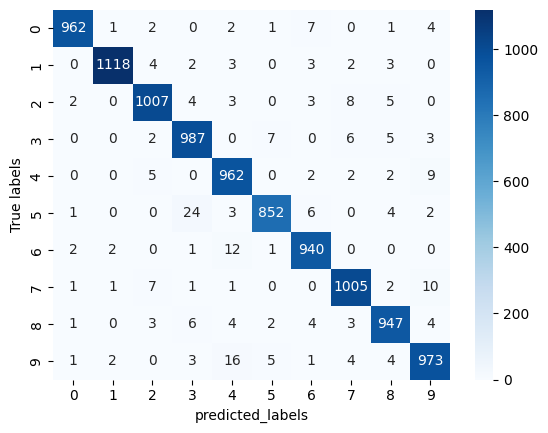

In [43]:
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('predicted_labels')

In [ ]:
#accuracy of model on test data is approx 0.97